In [196]:
# Load training data and simple statistics 
import os,tarfile
import pandas as pd
import numpy as np
DATA_PATH = "datasets"
TRAINING_DATA = "data_coding_exercise.txt"

def load_data(data_path = DATA_PATH, data = TRAINING_DATA):
    file_path = os.path.join(data_path, data)
    return pd.read_csv(file_path, sep = '\t',  names = ["Agent", "AgentFamily", "Version"])

agent = load_data()
agent.head()


,Agent,AgentFamily,Version
0,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.3...,Chrome,39
1,Mozilla/5.0 (Linux; Android 4.1.1; GT-N8010 Bu...,Chrome,54
2,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Chrome,39
3,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,Chrome,45
4,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.3...,Chrome,37


In [197]:
#check examples of the description and get an idea of token separator 
agent_description = list(agent['Agent'])
for i in range(10):
    print(agent_description[i])

Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2195.31 Safari/537.36
Mozilla/5.0 (Linux; Android 4.1.1; GT-N8010 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.85 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2175.61 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2480.83 Safari/537.36
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2072.40 Safari/537.36
Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2469.28 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1808.66 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2296.3 Safari/537.36
Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1975.31 Safari

In [198]:
#check the family of agents (make sure there are None)
agent_family = set(list(agent['AgentFamily']))
print(agent_family)

{'Firefox iOS', 'Opera Mobile', 'Sogou Explorer', 'Maxthon', 'Mobile Safari', 'Edge', 'Opera Mini', 'YandexSearch', 'AppleMail', 'UC Browser', 'Firefox', 'Facebook', 'Safari', 'Chrome Mobile', 'AOL', 'Amazon Silk', 'IE', 'Edge Mobile', 'IE Mobile', 'Puffin', 'Android', 'BlackBerry WebKit', 'QQ Browser', 'Chrome', 'Firefox Mobile', 'Opera', 'Chrome Mobile iOS', 'QQ Browser Mobile'}


In [199]:
#check size and some simple statistics 
agent.describe()

,Agent,AgentFamily,Version
count,421215,421215,421215
unique,421215,28,118
top,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,Chrome,33
freq,1,308656,25755


In [200]:
#checking whether we have missing information 
agent.info()
#No missing values, great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421215 entries, 0 to 421214
Data columns (total 3 columns):
Agent          421215 non-null object
AgentFamily    421215 non-null object
Version        421215 non-null object
dtypes: object(3)
memory usage: 9.6+ MB


In [201]:
agent["AgentFamily"].value_counts()

Chrome               308656
Chrome Mobile         50095
Facebook              18803
IE                    17426
Android                8155
UC Browser             5595
Mobile Safari          2383
QQ Browser Mobile      1745
Firefox                1661
Opera Mobile           1281
Opera                   921
Chrome Mobile iOS       911
Opera Mini              626
Safari                  626
QQ Browser              365
IE Mobile               305
BlackBerry WebKit       275
Firefox Mobile          248
Amazon Silk             224
AppleMail               120
Edge                    117
Edge Mobile             116
YandexSearch            111
Maxthon                 107
AOL                     100
Sogou Explorer           95
Puffin                   75
Firefox iOS              73
Name: AgentFamily, dtype: int64

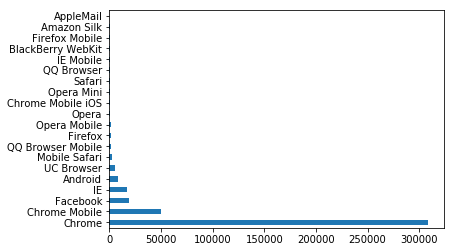

In [202]:

#%matplotlib inline
import matplotlib.pyplot as plt
agent["AgentFamily"].value_counts()[:20].plot(kind='barh')
plt.show()

In [203]:
agent["Version"].value_counts()

33     25755
35     23924
37     23889
34     23637
36     23468
44     22689
40     22360
43     21983
38     21564
42     21296
39     21173
32     20832
41     20032
45     19607
11     15189
55     14011
54      7436
4       7079
7       4834
53      3827
106     3688
52      3595
51      3594
30      3371
10      3339
75      3336
50      3091
49      2706
8       2506
46      2075
       ...  
16        83
90        78
91        74
83        72
88        68
89        68
86        66
85        62
87        61
81        50
84        50
77        49
82        45
80        44
601       35
79        32
602       31
76        25
600       23
69        15
71        14
70        12
537       11
534       10
0          9
533        7
78         4
603        3
536        2
451        1
Name: Version, Length: 118, dtype: int64

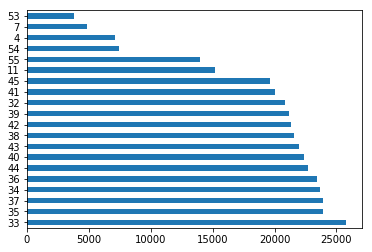

In [204]:

agent["Version"].value_counts()[:20].plot(kind='barh')
plt.show()


In [205]:
#split into training set and test set 
from sklearn.model_selection  import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(agent, agent["AgentFamily"]):
    strat_train_set = agent.loc[train_index]
    strat_test_set = agent.loc[test_index]
    
print(len(strat_train_set), "training set", len(strat_test_set), "test_set")
agent_training_family = strat_train_set.copy()

336972 training set 84243 test_set


In [206]:
#extract features from agent description
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_family = CountVectorizer(ngram_range=(2, 2))
#check output of vectorizer
analyze = vectorizer_family.build_analyzer()
for i in range(5):
    print(agent_training_family['Agent'][i])
    print(analyze(agent_training_family['Agent'][i]))


Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2195.31 Safari/537.36
['mozilla windows', 'windows nt', 'nt applewebkit', 'applewebkit 537', '537 36', '36 khtml', 'khtml like', 'like gecko', 'gecko chrome', 'chrome 39', '39 2195', '2195 31', '31 safari', 'safari 537', '537 36']
Mozilla/5.0 (Linux; Android 4.1.1; GT-N8010 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.85 Safari/537.36
['mozilla linux', 'linux android', 'android gt', 'gt n8010', 'n8010 build', 'build jro03c', 'jro03c applewebkit', 'applewebkit 537', '537 36', '36 khtml', 'khtml like', 'like gecko', 'gecko chrome', 'chrome 54', '54 2840', '2840 85', '85 safari', 'safari 537', '537 36']
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2175.61 Safari/537.36
['mozilla windows', 'windows nt', 'nt wow64', 'wow64 applewebkit', 'applewebkit 537', '537 36', '36 khtml', 'khtml like', 'like gecko', 'gecko chrome', 'chrome 39', '39 2175', '2

In [222]:
#fit transform
X_family_train = vectorizer_family.fit_transform(agent_training_family['Agent'].values.astype('U'))
X_family_train

<336972x140214 sparse matrix of type '<class 'numpy.int64'>'
	with 5617539 stored elements in Compressed Sparse Row format>

In [223]:
#show the top 10 frequent words and their frequency of the default vectorizer
low_frequency_keys = sorted(vectorizer_family.vocabulary_, key=vectorizer_family.vocabulary_.get, reverse=True)[:100]
for k in low_frequency_keys:
    print(k, vectorizer_family.vocabulary_[k]/len(agent))


zz zz 0.332877509111
zz samsung 0.332875135026
zytir1ppxok cgih0e 0.332872760942
zyipbdtxzdc chbok5 0.332870386857
zxeozyi_vew rv 0.332868012773
zx840hd build 0.332865638688
zx rk2926 0.332863264604
zx d23 0.332860890519
zx a13 0.332858516435
zwrz1i0ex chcxvo 0.33285614235
zvii build 0.332853768266
zvi imm76d 0.332851394181
zvc gwk74 0.332849020097
zvav es 0.332846646012
zvav de 0.332844271928
zv5 vm696 0.332841897843
zv5 gwk74 0.332839523759
zv4 gwk74 0.332837149674
zuum_zen_i build 0.33283477559
zuum pro 0.332832401505
zuum forza 0.332830027421
zurich financial 0.332827653336
zune net4 0.332825279252
zune ms 0.332822905167
zune creative 0.332820531083
zuk z2151 0.332818156998
zuk z2132 0.332815782914
zuk z2131 0.332813408829
zuk z2121 0.332811034745
zuk z1 0.33280866066
zug build 0.332806286576
zug 5s 0.332803912491
zu presto 0.332801538407
ztjmhjo0iti cggqng 0.332799164322
zten790 applewebkit 0.332796790238
zteba610t linux 0.332794416153
zteba510 linux 0.332792042069
zte_u809_td v1 

In [224]:
#show the bottom 10 frequent words and its frequency of the default vectorizer
low_frequency_keys = sorted(vectorizer_family.vocabulary_, key=vectorizer_family.vocabulary_.get)[:100]
for k in low_frequency_keys:
    print(k, vectorizer_family.vocabulary_[k]/len(agent))

00 04 0.0
00 05 2.37408449367e-06
00 161 4.74816898733e-06
00 23 7.122253481e-06
00 33 9.49633797467e-06
00 40 1.18704224683e-05
00 applewebkit 1.4244506962e-05
00 build 1.66185914557e-05
00 d1 1.89926759493e-05
00 kr 2.1366760443e-05
00 mv 2.37408449367e-05
00 presto 2.61149294303e-05
00 rog 2.8489013924e-05
00 safari 3.08630984177e-05
00 u2 3.32371829113e-05
00 windows 3.5611267405e-05
00 wv 3.79853518987e-05
000 33 4.03594363923e-05
000 applewebkit 4.2733520886e-05
0000 0000 4.51076053797e-05
0000 000000004000 4.74816898733e-05
0000 applewebkit 4.9855774367e-05
0000 build 5.22298588607e-05
00000000 0000 5.46039433543e-05
000000004000 koboaffiliate 5.6978027848e-05
00000000877d windows 5.93521123417e-05
000000062262 windows 6.17261968353e-05
000000071299 windows 6.4100281329e-05
000000084866 windows 6.64743658227e-05
000000096386 windows 6.88484503163e-05
000000108099 windows 7.122253481e-05
000000121131 windows 7.35966193037e-05
00000015242a windows 7.59707037973e-05
000000218102 wi

In [225]:
#apply  Tf–idf term weighting
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_family = TfidfTransformer(smooth_idf=False)
tfidf_family = tfidf_transformer_family.fit_transform(X_family_train)
tfidf_family.shape

(336972, 140214)

In [226]:
#Train the classifier (choose SVM) for the family
from sklearn.linear_model import SGDClassifier
#Needs to tune penalty and alpha
clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5, random_state=42)
family_clf_svm = clf_svm.fit(tfidf_family, agent_training_family["AgentFamily"])

In [227]:
#Measure on the test set
agent_test_family = strat_test_set.copy()
X_family_test = vectorizer_family.transform(agent_test_family['Agent'].values.astype('U'))
tfidf_family_test = tfidf_transformer_family.transform(X_family_test)
predicted_family_svm_test = family_clf_svm.predict(tfidf_family_test)
np.mean(predicted_family_svm_test == agent_test_family['AgentFamily'])

0.9561675395157172

In [234]:
#Fine tune the model using Grid Search or Randomized Search
#form the pipeline 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
cls_family = Pipeline([
        ("vect", CountVectorizer(ngram_range=(2, 2))),
        ("tfidf", TfidfTransformer()),
        ("clf-svm",  SGDClassifier(loss='hinge', max_iter=5, random_state=42)),
])

parameters_svm = {
                  'clf-svm__alpha': (1e-2, 1e-3),
}

gs_clf_family = GridSearchCV(cls_family, parameters_svm, n_jobs=-1)
gs_clf_family = gs_clf_family.fit(agent_training_family['Agent'].values.astype('U'), agent_training_family["AgentFamily"].values.astype('U'))
gs_clf_family.best_score_
gs_clf_family.best_params_

{'clf-svm__alpha': 0.001}

In [236]:
print(gs_clf_family.best_score_)
print(gs_clf_family.best_params_)
type(gs_clf_family)

0.957563239676
{'clf-svm__alpha': 0.001}


sklearn.model_selection._search.GridSearchCV

In [237]:
#use the gridsearched classfier to predict 
predicted_family_svm_test = gs_clf_family.predict(agent_test_family['Agent'].values.astype('U'))
np.mean(predicted_family_svm_test == agent_test_family['AgentFamily'])


0.95658318192074299

In [228]:
# Load test data 
DATA_PATH = "datasets"
TRAINING_DATA = "test_data_coding_exercise.txt"

def load_data(data_path = DATA_PATH, data = TRAINING_DATA):
    file_path = os.path.join(data_path, data)
    return pd.read_csv(file_path, sep = '\t',  names = ["Agent", "AgentFamily", "Version"])

agent_test_out = load_data()
agent_test_out.head()


,Agent,AgentFamily,Version
0,Mozilla/5.0 (Windows NT 6.2; Win64; x64) Apple...,Chrome,39
1,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Chrome,32


In [229]:
#Measure on the outside test set
X_family_test_out = vectorizer_family.transform(agent_test_out['Agent'].values.astype('U'))
tfidf_family_test_out = tfidf_transformer_family.transform(X_family_test_out)
predicted_family_svm_test_out = text_clf_svm.predict(tfidf_family_test_out)
print(predicted_family_svm_test_out)
np.mean(predicted_family_svm_test_out == agent_test_out['AgentFamily'])

['Chrome' 'Chrome']


1.0

In [216]:
#check set of version number
agent_version = set(list(agent['Version']))
print(agent_version)
print(len(agent_version))

{'34', '75', '43', '15', '11', '71', '51', '103', '19', '13', '35', '2', '82', '66', '65', '601', '59', '102', '87', '24', '91', '25', '4', '83', '84', '40', '94', '39', '37', '16', '107', '68', '29', '0', '76', '56', '1', '8', '99', '57', '36', '46', '14', '21', '73', '45', '105', '64', '32', '70', '26', '54', '6', '92', '69', '96', '44', '12', '534', '78', '89', '23', '90', '72', '38', '86', '5', '63', '55', '533', '53', '104', '27', '81', '42', '7', '98', '88', '20', '79', '600', '537', '536', '50', '3', '95', '30', '61', '93', '85', '100', '74', '47', '67', 'None', '10', '49', '48', '41', '451', '58', '60', '9', '22', '97', '33', '603', '28', '101', '17', '62', '77', '52', '31', '80', '602', '18', '106'}
118


In [238]:
#Resample for Version as Family and Version has different bias
#Drop rows where its version number is unique
version_counts_dict = agent["Version"].value_counts().to_dict()
print(version_counts_dict['None'])
version_w_one_occurance = [k for k in version_counts_dict if version_counts_dict[k]==1]
print(version_w_one_occurance)
#filter none value
agent_filter_null_value = agent.loc[agent["Version"] != 'None']
agent_filter_one_freq = agent_filter_null_value.loc[~agent_filter_null_value["Version"].isin(version_w_one_occurance)]
print("length before filtering", len(agent))
print("length after filtering", len(agent_filter_one_freq))
for train_index, test_index in split.split(agent_filter_one_freq, agent_filter_one_freq["Version"]):
    strat_train_set = agent_filter_one_freq.loc[train_index]
    strat_test_set = agent_filter_one_freq.loc[test_index]
    
print(len(strat_train_set), "training set", len(strat_test_set), "test_set")
agent_training_version = strat_train_set.copy()

179
['451']
length before filtering 421215
length after filtering 421035
336828 training set 84207 test_set


In [218]:
#fit transform
vectorizer_version = CountVectorizer(ngram_range=(2, 2))
X_version_train = vectorizer_version.fit_transform(agent_training_version['Agent'].values.astype('U'))
tfidf_version_transformer = TfidfTransformer(smooth_idf=False)
tfidf_version_train = tfidf_version_transformer.fit_transform(X_version_train)

In [219]:
#Train the classifier (choose SVM) for the version number
#Needs to tune penalty and alpha
clf_svm_version = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5, random_state=42)
verion_clf_svm = clf_svm_version.fit(tfidf_version_train, agent_training_version["Version"].astype('U'))

In [220]:
#Predict on the test set 
agent_test_version = strat_test_set.copy()
X_version_test = vectorizer_version.transform(agent_test_version['Agent'].values.astype('U'))
tfidf_version_test = tfidf_version_transformer.transform(X_version_test)
predicted_version_svm_test = verion_clf_svm.predict(tfidf_version_test)
#print(predicted_version_svm_test[:20])
np.mean(predicted_version_svm_test == agent_test_version['Version'].astype('U'))

0.95701069982305509

In [221]:
#Measure on the outside test set
X_version_test_out = vectorizer_version.transform(agent_test_out['Agent'].values.astype('U'))
tfidf_version_test_out = tfidf_version_transformer.transform(X_version_test_out)
predicted_version_svm_test_out = verion_clf_svm.predict(tfidf_version_test_out)
print(predicted_version_svm_test_out)
np.mean(predicted_version_svm_test_out == agent_test_out['Version'].astype('U'))

['39' '32']


1.0